In [ ]:
## import the required libraries
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('alzheimers_disease_data.csv')

In [3]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

***NO NULL VALUES***

In [5]:
df.duplicated().sum()

0

**NO DUPLICATES**

In [6]:
df.drop(columns = {'DoctorInCharge'}, inplace = True)

In [7]:
df.drop(columns = {'PatientID'},inplace = True)

In [70]:
df.groupby('Diagnosis')['Diagnosis'].count()

Diagnosis
0    1389
1     760
Name: Diagnosis, dtype: int64

We observe that the data is not balanced as there are more negative cases.

In [8]:
df['Age'].unique()

array([73, 89, 74, 86, 68, 75, 72, 87, 78, 84, 64, 69, 63, 65, 82, 77, 71,
       83, 79, 67, 66, 70, 85, 60, 88, 62, 81, 61, 80, 90, 76],
      dtype=int64)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


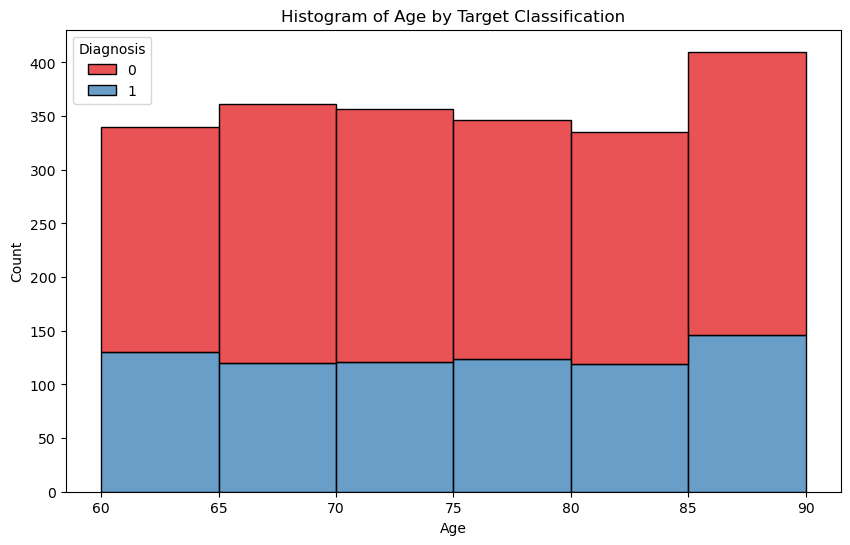

In [10]:
## Effect of Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Diagnosis', multiple='stack', bins=6, palette='Set1')
plt.title('Histogram of Age by Target Classification')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Not getting much evidence, lets get the percentage of positive diagnosis.

C:\Users\Ranjeet Singh\AppData\Local\Temp\ipykernel_2332\927184152.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentage_df = df.groupby('Age_bin')['Diagnosis'].mean().reset_index()
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


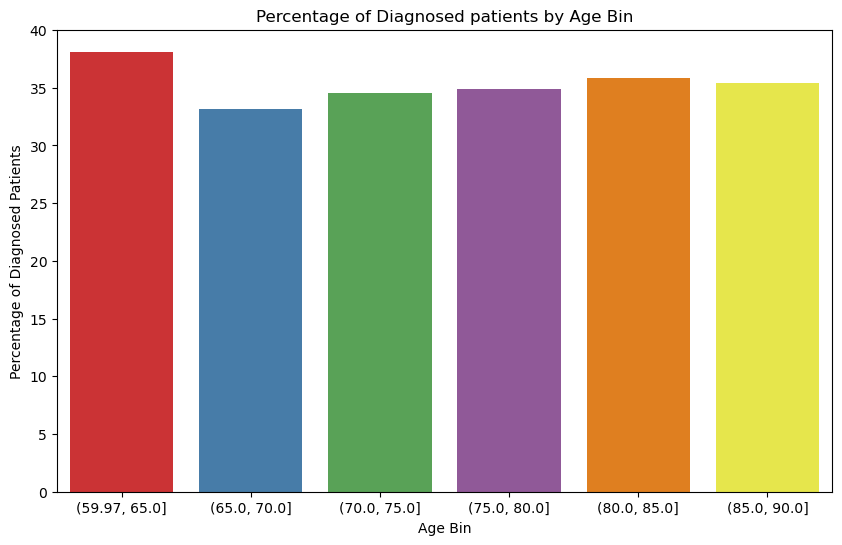

In [11]:
bins = 6
df['Age_bin'] = pd.cut(df['Age'], bins=bins)

percentage_df = df.groupby('Age_bin')['Diagnosis'].mean().reset_index()
percentage_df['Diagnosis'] *= 100  # Convert to percentage

# Plotting the percentages
plt.figure(figsize=(10, 6))
sns.barplot(data=percentage_df, x='Age_bin', y='Diagnosis', palette='Set1')
plt.title('Percentage of Diagnosed patients by Age Bin')
plt.xlabel('Age Bin')
plt.ylabel('Percentage of Diagnosed Patients')
plt.show()

As per the web, the chances of diagnosis increase with age after 65. However, this is not prominent in the given data.

In [12]:
## How gender affects the diagnosis

gender_df = df.groupby('Gender')['Diagnosis'].mean().reset_index()
gender_df['Diagnosis']*= 100
gender_df['Gender'] = gender_df['Gender'].apply(lambda x : 'Male' if x == 0 else 'Female' )

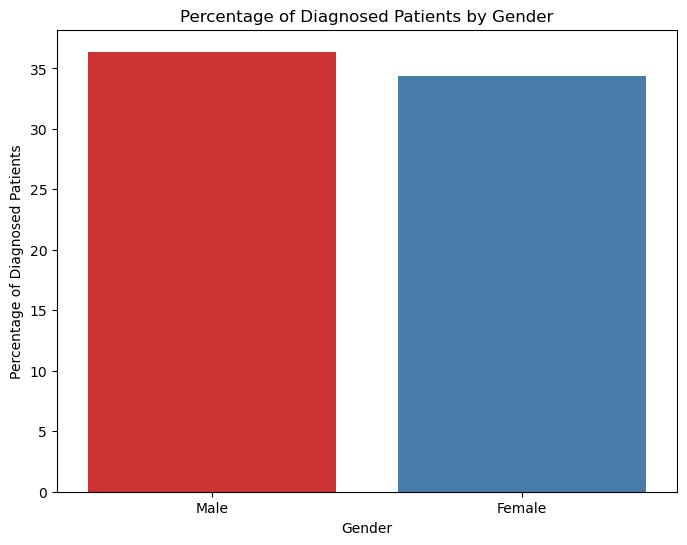

In [13]:
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_df, x='Gender', y='Diagnosis', palette='Set1')
plt.title('Percentage of Diagnosed Patients by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of Diagnosed Patients')
plt.show()

The gender of the patient is not a strong feature to classify the diagnosis.

In [14]:
## Effect of Ethnicity
ethnicity_df = df.groupby('Ethnicity')['Diagnosis'].mean().reset_index()
ethnicity_df['Diagnosis']*= 100

eth_dict = {0 : 'Caucasian', 1 : 'African American', 2 : 'Asian' , 3 : 'Other'}

ethnicity_df['Ethnicity'] = ethnicity_df['Ethnicity'].apply(lambda x : eth_dict[x])

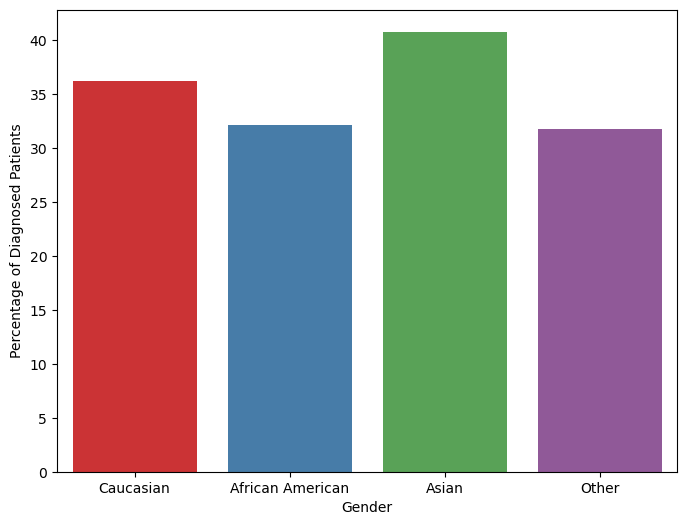

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(data=ethnicity_df, x='Ethnicity', y='Diagnosis', palette='Set1')
plt.xlabel('Gender')
plt.ylabel('Percentage of Diagnosed Patients')
plt.show()

Prominent in Asian and Caucasians. Maybe divide the data encoding Asian and Caucasian as 1 and rest as 0.

In [16]:
df['EducationLevel'].unique()

array([2, 0, 1, 3], dtype=int64)

In [17]:
## Education Level 

edu_df = df.groupby('EducationLevel')['Diagnosis'].mean().reset_index()
edu_df['Diagnosis'] *= 100

edu_dict = {0 :'None' , 1: 'High School' , 2: 'Bachelors' , 3: 'Higher'}

edu_df['EducationLevel'] = edu_df['EducationLevel'].apply(lambda x : edu_dict[x])

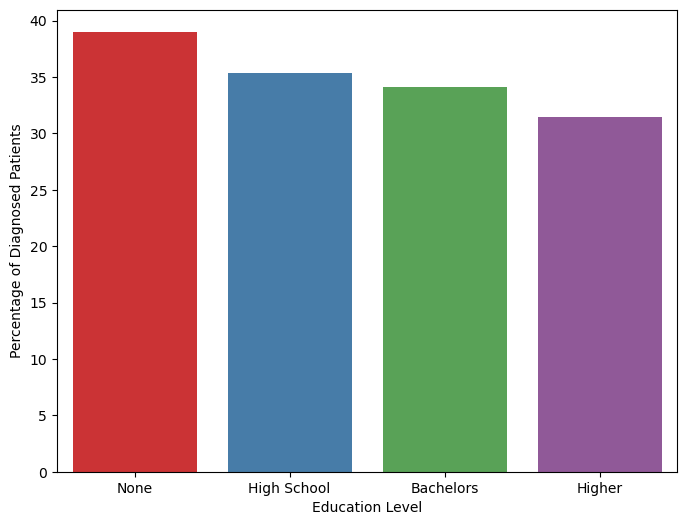

In [18]:
plt.figure(figsize=(8, 6))
sns.barplot(data=edu_df, x='EducationLevel', y='Diagnosis', palette='Set1')
plt.xlabel('Education Level')
plt.ylabel('Percentage of Diagnosed Patients')

plt.show()

The chances of diagnosis decreases as the education level increases. This can be used as ordinal categorical variable or maybe split through high school and bachelors.

In [19]:
#BMI Effect 

bmi_bins = [0, 18.5, 24.9, 29.9, float('inf')]
bmi_labels = ['Underweight', 'Healthy', 'Overweight', 'Obese']

df['BMI_category'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels, right=False)



In [20]:
bmi_df = df.groupby('BMI_category')['Diagnosis'].mean().reset_index()
bmi_df['Diagnosis']*= 100


C:\Users\Ranjeet Singh\AppData\Local\Temp\ipykernel_2332\3757668094.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_df = df.groupby('BMI_category')['Diagnosis'].mean().reset_index()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


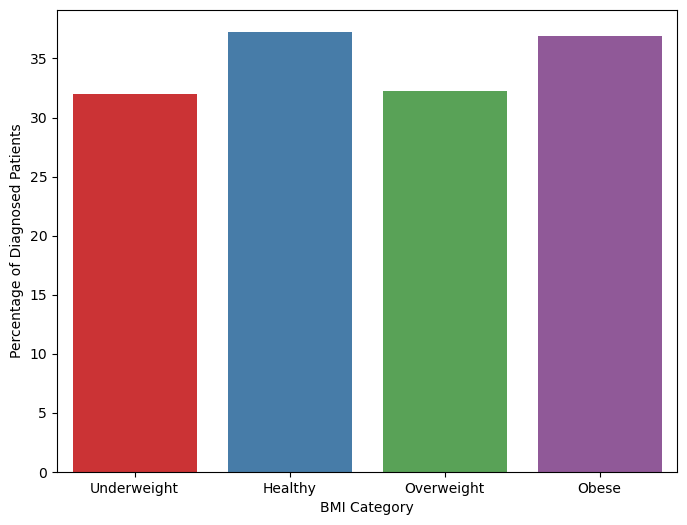

In [21]:
plt.figure(figsize=(8, 6))
sns.barplot(data=bmi_df, x='BMI_category', y='Diagnosis', palette='Set1')
plt.xlabel('BMI Category')
plt.ylabel('Percentage of Diagnosed Patients')

plt.show()

There is no such relation of BMI with the diagnosis. So this feature might not be useful for prediction.

In [22]:
## Smoking Effect

smoking_df = df.groupby('Smoking')['Diagnosis'].mean().reset_index()
smoking_df['Diagnosis']*= 100

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


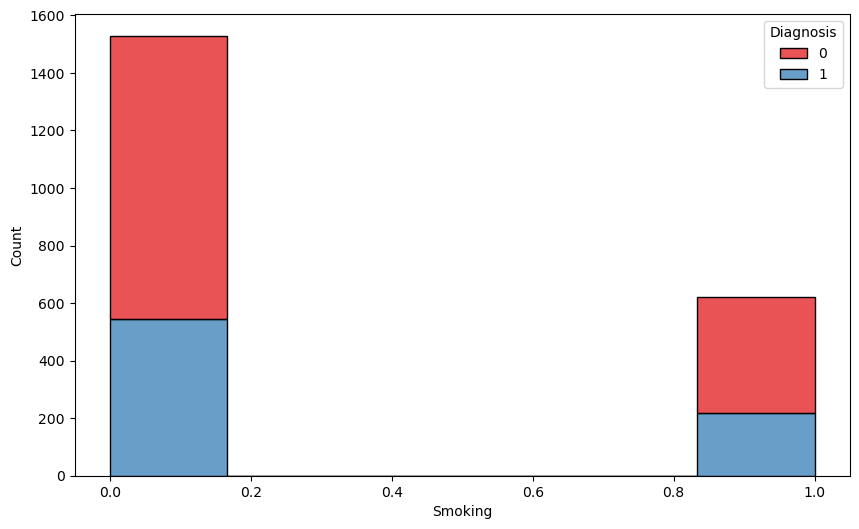

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Smoking', hue='Diagnosis', multiple='stack', bins=6, palette='Set1')

plt.xlabel('Smoking')
plt.ylabel('Count')
plt.show()

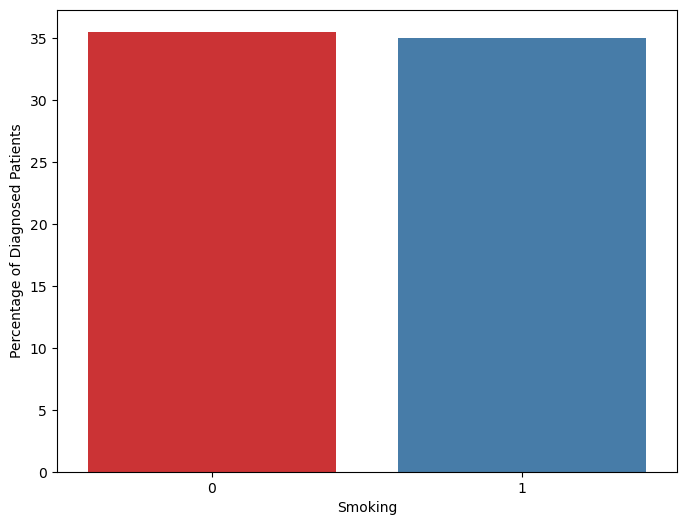

In [24]:
plt.figure(figsize=(8, 6))
sns.barplot(data=smoking_df, x='Smoking', y='Diagnosis', palette='Set1')
plt.xlabel('Smoking')
plt.ylabel('Percentage of Diagnosed Patients')

plt.show()

Since the percentage is nearly same, the smoking habit of the patient does not contribute to the diagnosis.

In [25]:
display(df.head())

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,Age_bin,BMI_category
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,0,1.725883,0,0,0,1,0,0,"(70.0, 75.0]",Healthy
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,0,2.592424,0,0,0,0,1,0,"(85.0, 90.0]",Overweight
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,0,7.119548,0,1,0,1,0,0,"(70.0, 75.0]",Underweight
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,1,6.481226,0,0,0,0,0,0,"(70.0, 75.0]",Obese
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,0,0.014691,0,0,1,1,0,0,"(85.0, 90.0]",Healthy


In [26]:
df['AlcoholConsumption'].head()

0    13.297218
1     4.542524
2    19.555085
3    12.209266
4    18.454356
Name: AlcoholConsumption, dtype: float64

<Axes: xlabel='Diagnosis', ylabel='AlcoholConsumption'>

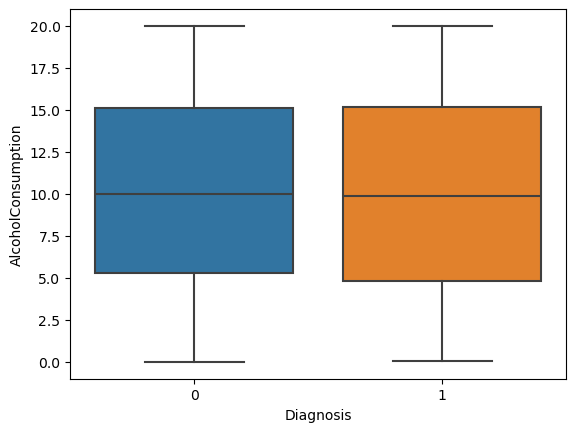

In [27]:
#Alcohol Consumption

sns.boxplot(data = df, x ='Diagnosis', y='AlcoholConsumption')

We see no relation of Alcohol Consumption with the Diagnosis.

<Axes: xlabel='Diagnosis', ylabel='PhysicalActivity'>

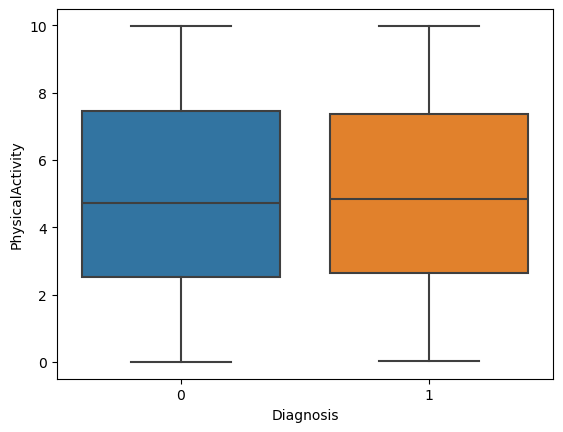

In [28]:
sns.boxplot(data = df, x = 'Diagnosis',y = 'PhysicalActivity' )

There is also no relation with the Physical Activity of the patient.

<Axes: xlabel='Diagnosis', ylabel='DietQuality'>

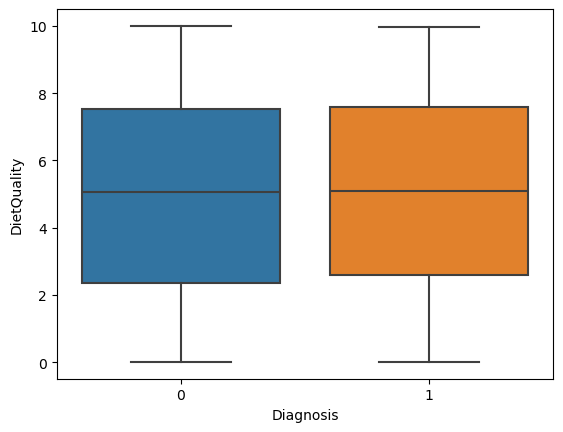

In [29]:
sns.boxplot(data = df, x ='Diagnosis', y = 'DietQuality')

<Axes: xlabel='Diagnosis', ylabel='SleepQuality'>

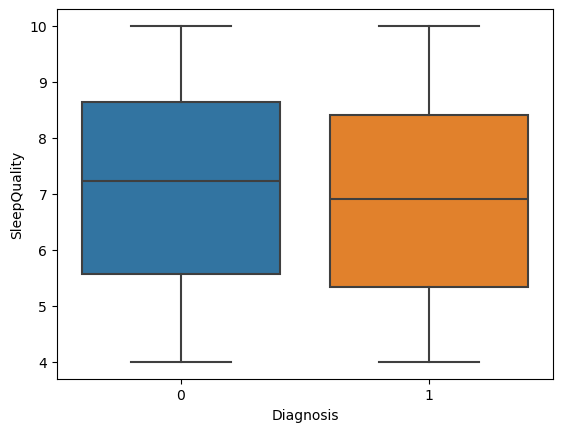

In [30]:
sns.boxplot(data=df,x = 'Diagnosis', y='SleepQuality')

Since there is no distinction of diagnosis for these features, there are not relevant for the model.

## EDA on Medical History

In [31]:
#Family History Relation

fh_df = df.groupby('FamilyHistoryAlzheimers')['Diagnosis'].mean().reset_index()

In [32]:
fh_df

,FamilyHistoryAlzheimers,Diagnosis
0,0,0.362788
1,1,0.326568


Since the percentage of cases in both the scenarios is nearly equal, there is no evidence of family history of Alzheimer's for diagnosis.

In [33]:
df.groupby('CardiovascularDisease')['Diagnosis'].mean().reset_index()

,CardiovascularDisease,Diagnosis
0,0,0.347471
1,1,0.390323


In [34]:
df.groupby('Diabetes')['Diagnosis'].mean().reset_index()

,Diabetes,Diagnosis
0,0,0.360000
1,1,0.317901


In [35]:
df.groupby('Depression')['Diagnosis'].mean().reset_index()

,Depression,Diagnosis
0,0,0.355064
1,1,0.348028


In [36]:
df.groupby('HeadInjury')['Diagnosis'].mean().reset_index()

,HeadInjury,Diagnosis
0,0,0.356923
1,1,0.321608


In [37]:
df.groupby('Hypertension')['Diagnosis'].mean().reset_index()

,Hypertension,Diagnosis
0,0,0.346638
1,1,0.393750


## EDA on Clinical Measurments.

<Axes: xlabel='Diagnosis', ylabel='SystolicBP'>

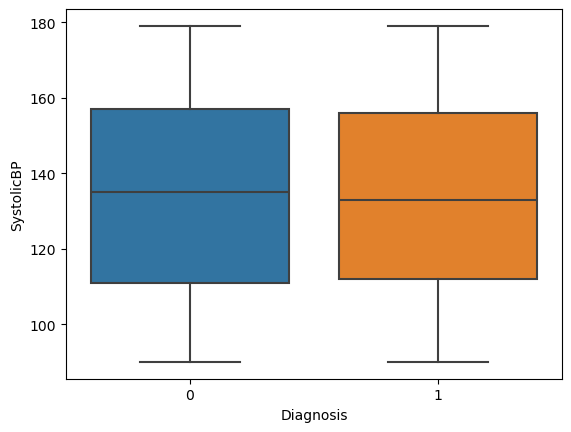

In [38]:
sns.boxplot(data=df,x = 'Diagnosis',y='SystolicBP')

<Axes: xlabel='Diagnosis', ylabel='DiastolicBP'>

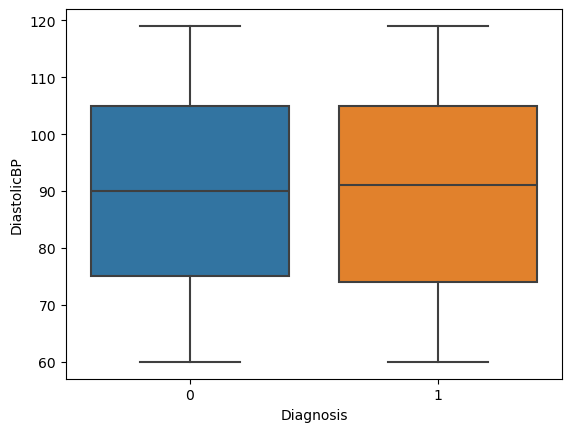

In [39]:
sns.boxplot(data=df,x = 'Diagnosis',y='DiastolicBP')

<Axes: xlabel='Diagnosis', ylabel='CholesterolTotal'>

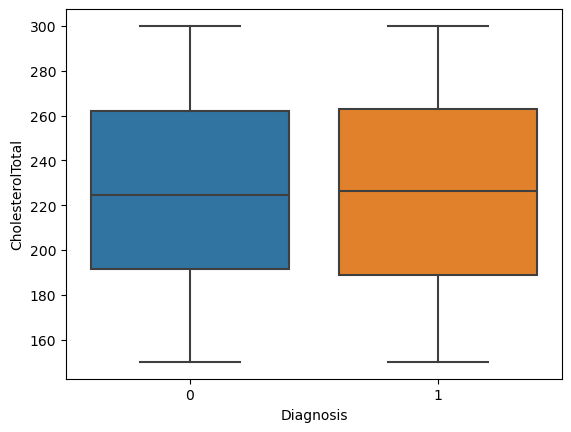

In [40]:
sns.boxplot(data=df,x = 'Diagnosis',y='CholesterolTotal')

<Axes: xlabel='Diagnosis', ylabel='CholesterolLDL'>

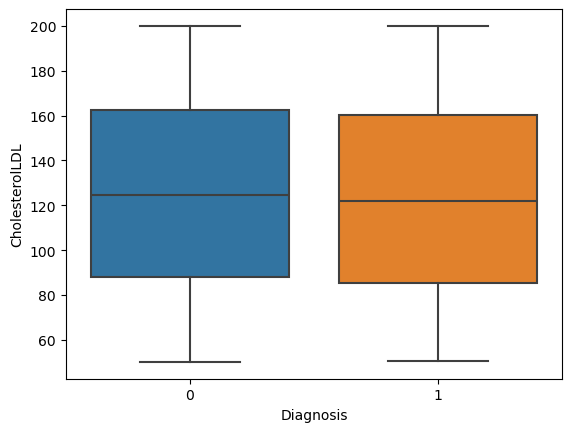

In [41]:
sns.boxplot(data=df,x = 'Diagnosis',y='CholesterolLDL')

<Axes: xlabel='Diagnosis', ylabel='CholesterolHDL'>

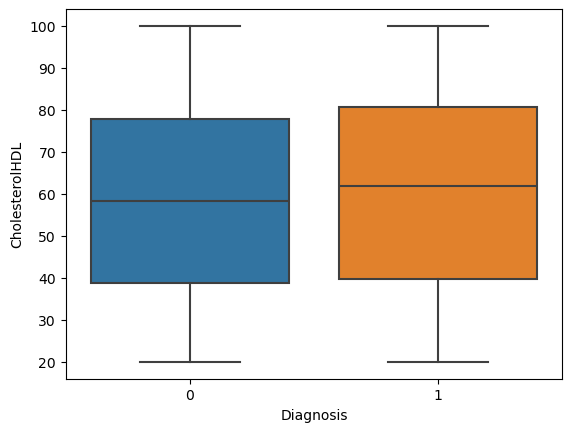

In [42]:
sns.boxplot(data=df,x = 'Diagnosis',y='CholesterolHDL')

<Axes: xlabel='Diagnosis', ylabel='CholesterolTriglycerides'>

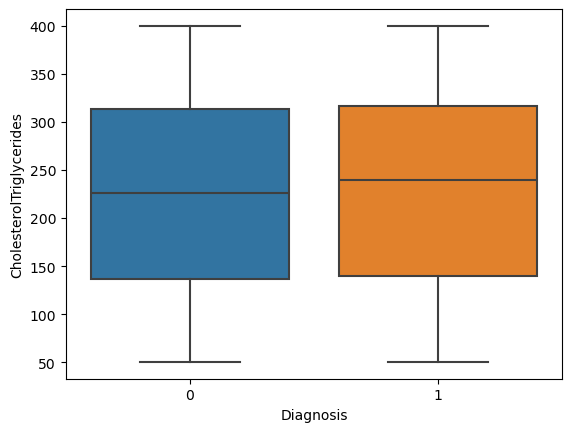

In [43]:
sns.boxplot(data=df,x = 'Diagnosis',y='CholesterolTriglycerides')

There is no distinction for diagnosis based on the Clinical Measurements. Hence these features won't be relevant for our model as they don't depend on the diagnosis result.

## EDA on Cognitive Assessments

<Axes: xlabel='Diagnosis', ylabel='MMSE'>

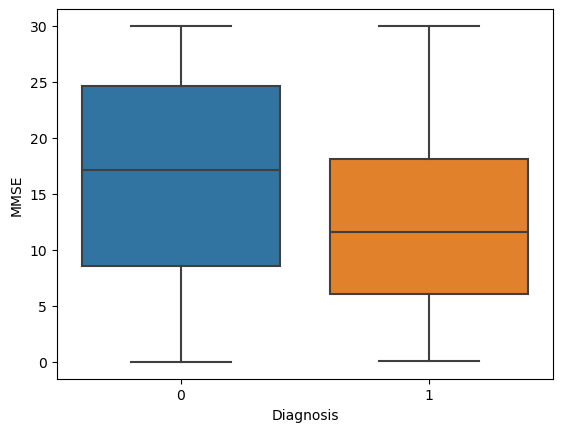

In [44]:
sns.boxplot(data=df,x = 'Diagnosis', y= 'MMSE')

Since lower MMSE scores indicate cognitive impairment, we can observe that there is significant difference in the median MMSE score. The patients that are diagnosed have lower median MMSE score. This feature could be used.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Diagnosis', ylabel='FunctionalAssessment'>

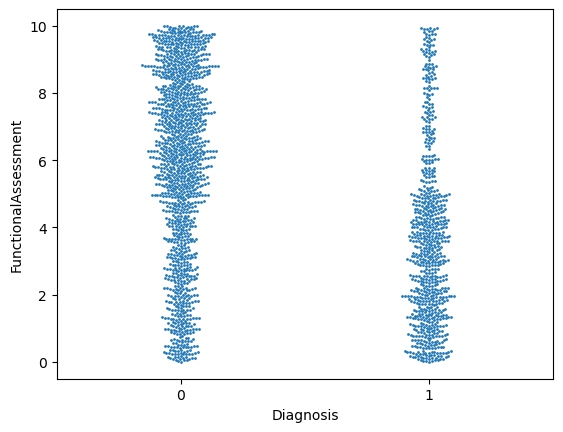

In [45]:
sns.swarmplot(data=df,x='Diagnosis',y='FunctionalAssessment',size = 2)

We observe that there are a lot of diagnosed patients with score less than 5. Most of the diagnosed patients have lower scores in this test.

<Axes: xlabel='MemoryComplaints', ylabel='Diagnosis'>

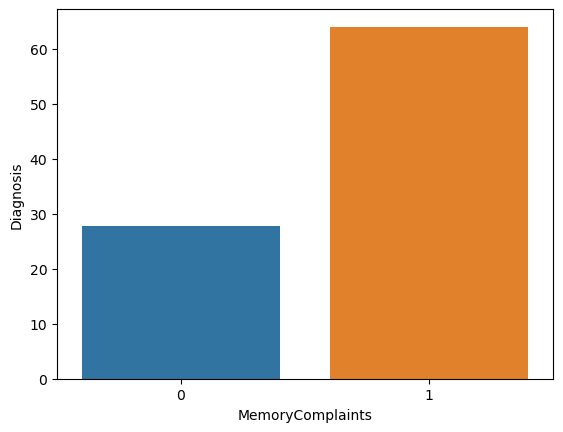

In [46]:
memcomp = df.groupby('MemoryComplaints')['Diagnosis'].mean().reset_index()
memcomp['Diagnosis']*= 100
sns.barplot(x='MemoryComplaints', y='Diagnosis', data=memcomp)

We observe that the majority of the diagnosed patients have memory complaints. Hence this feature would be very decisive for predictions.

<Axes: xlabel='BehavioralProblems', ylabel='Diagnosis'>

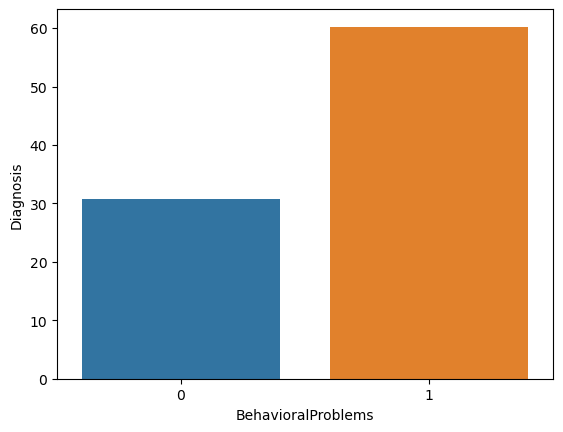

In [47]:
beh_comp = df.groupby('BehavioralProblems')['Diagnosis'].mean().reset_index()
beh_comp['Diagnosis']*= 100
sns.barplot(x='BehavioralProblems', y='Diagnosis', data=beh_comp)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Diagnosis', ylabel='ADL'>

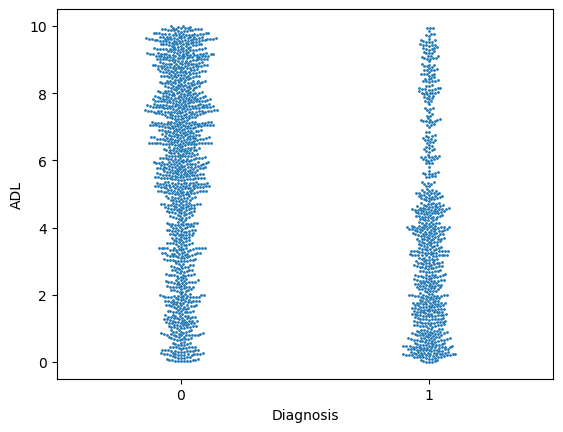

In [48]:
sns.swarmplot(data = df, x = 'Diagnosis', y = 'ADL',size = 2)

Since lower scores imply impairment,we observe that most of the diagnosed patients have lower ADL and vice versa for patients which are not diagnosed.

## EDA on Symptoms

In [49]:
df.groupby('Confusion')['Diagnosis'].mean().reset_index()

,Confusion,Diagnosis
0,0,0.358314
1,1,0.335601


In [50]:
df.groupby('Disorientation')['Diagnosis'].mean().reset_index()

,Disorientation,Diagnosis
0,0,0.358762
1,1,0.326471


In [51]:
df.groupby('PersonalityChanges')['Diagnosis'].mean().reset_index()

,PersonalityChanges,Diagnosis
0,0,0.357808
1,1,0.330247


In [52]:
df.groupby('DifficultyCompletingTasks')['Diagnosis'].mean().reset_index()

,DifficultyCompletingTasks,Diagnosis
0,0,0.351770
1,1,0.363636


In [53]:
df.groupby('Forgetfulness')['Diagnosis'].mean().reset_index()

,Forgetfulness,Diagnosis
0,0,0.353764
1,1,0.353395


We observe that these features don't have significant relation with the diagnosis as the percentage in both the cases is nearly same.

#### Creating a correlation matrix and Further Analysis

Find out ways to choose features for classfication models (correlations) and make models and evaluations.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        2149 non-null   int64   
 1   Gender                     2149 non-null   int64   
 2   Ethnicity                  2149 non-null   int64   
 3   EducationLevel             2149 non-null   int64   
 4   BMI                        2149 non-null   float64 
 5   Smoking                    2149 non-null   int64   
 6   AlcoholConsumption         2149 non-null   float64 
 7   PhysicalActivity           2149 non-null   float64 
 8   DietQuality                2149 non-null   float64 
 9   SleepQuality               2149 non-null   float64 
 10  FamilyHistoryAlzheimers    2149 non-null   int64   
 11  CardiovascularDisease      2149 non-null   int64   
 12  Diabetes                   2149 non-null   int64   
 13  Depression                 2149 n

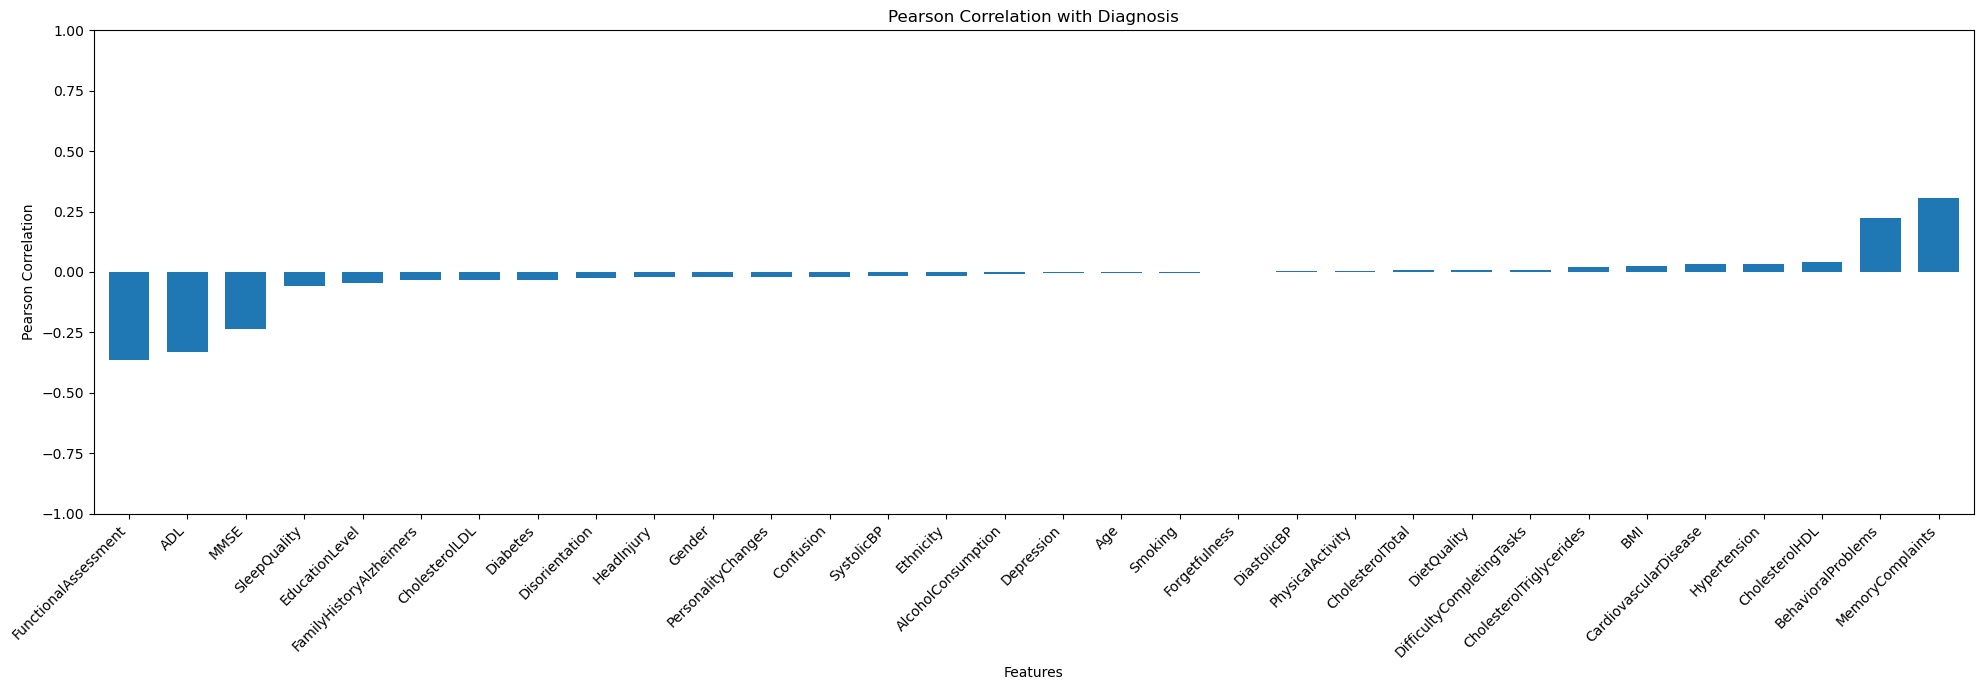

In [64]:
# Compute Pearson correlation coefficients
correlations = df.corr(numeric_only=True)['Diagnosis'][:-1].sort_values()

# Set the size of the figure
plt.figure(figsize=(20, 7))

# Create a bar plot of the Pearson correlation coefficients
ax = correlations.plot(kind='bar', width=0.7)

# Set the y-axis limits and labels
ax.set(ylim=[-1, 1], ylabel='Pearson Correlation', xlabel='Features', 
       title='Pearson Correlation with Diagnosis')

# Rotate x-axis labels for better readability
ax.set_xticklabels(correlations.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

Since these following features : ***['FunctionalAssessment','ADL','MMSE'.'BehavioralProblems','MemoryComplaints']*** have only significant correlation with Diagnosis, hence we would consider only these features.

In [60]:
FEATURES = ['MMSE','FunctionalAssessment','MemoryComplaints','BehavioralProblems','ADL']
TARGET = ['Diagnosis']

In [61]:
req_df = df[FEATURES+TARGET]

In [65]:
req_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMSE                  2149 non-null   float64
 1   FunctionalAssessment  2149 non-null   float64
 2   MemoryComplaints      2149 non-null   int64  
 3   BehavioralProblems    2149 non-null   int64  
 4   ADL                   2149 non-null   float64
 5   Diagnosis             2149 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 100.9 KB


In [67]:
req_df.head()

,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Diagnosis
0,21.463532,6.518877,0,0,1.725883,0
1,20.613267,7.118696,0,0,2.592424,0
2,7.356249,5.895077,0,0,7.119548,0
3,13.991127,8.965106,0,1,6.481226,0
4,13.517609,6.045039,0,0,0.014691,0


In [79]:
from sklearn.model_selection import train_test_split
X = df[FEATURES]
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, shuffle = True)



## Training Different Models

Various models would be used for training the model and will use the Precision,Recall and F-beta scores to evaluate different models.

### 1. **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logres = LogisticRegression(random_state=2,max_iter = 300,C = 1).fit(X_train, y_train)

logres.predict()